# Аналитика в авиакомпании

Компания «F9» — это российская авиакомпания, выполняющая внутренние пассажирские авиаперевозки. Сотни перелётов каждый день. Важно понять предпочтения пользователей, покупающих билеты на те или иные направления.
Необходимо изучить базу данных и проанализировать спрос пассажиров на рейсы в города, где проходят крупнейшие фестивали.

Основные задачи, которые необходимо будет решить в рамках проекта:
- Открытие файлов с данными, изучение общей информации, проверка данных на корректность;
- Определение топ-10 городов по количеству рейсов;
- Построение графиков: моделей самолетов и количества рейсов, городов и количество рейсов, топ-10 городов и количество рейсов, и формулировка выводов.

## Получение данных из файла и изучение общей информации

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
model_flights = pd.read_csv('/datasets/query_1.csv')
model_flights

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185


In [ ]:
model_flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


In [ ]:
city_flights = pd.read_csv('/datasets/query_3.csv')
city_flights

,city,average_flights
0,Абакан,3.870968
1,Анадырь,1.000000
2,Анапа,2.161290
3,Архангельск,5.354839
4,Астрахань,2.451613
...,...,...
96,Чита,1.580645
97,Элиста,4.870968
98,Южно-Сахалинск,4.290323
99,Якутск,2.741935


In [ ]:
city_flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


Проверим данные на дубликаты.

In [ ]:
city_flights.duplicated().sum()

0

In [ ]:
city_flights['city'].duplicated().sum()

0

- Типы данных столбцов в обеих таблицах корректны: наименования моделей самолетов и городов - строковой тип данных, количество рейов - целочисленный, среднее количество рейсов - вещественный.
- Пропуски в данных отсутствуют.
- Дубликаты отсутствуют.

## Анализ данных

### Графики

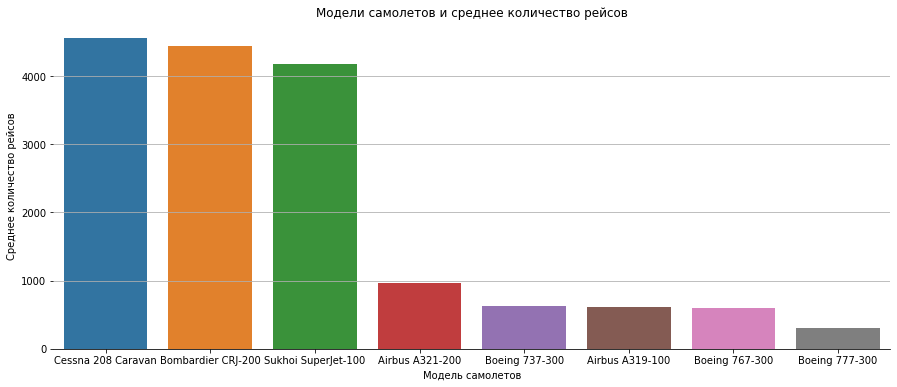

In [ ]:
f, ax = plt.subplots(figsize=(15, 6))

sns.barplot(data=model_flights.sort_values('flights_amount',ascending = False), x='model', y='flights_amount').set(title='Модели самолетов и среднее количество рейсов',
                                                                                                                   xlabel= 'Модель самолетов',
                                                                                                                   ylabel= 'Cреднее количество рейсов')
ax.yaxis.grid(True)
sns.despine(left=True, bottom=False)

- Самые используемые модели самолетов в сентябре 2018 года (более 4000 рейсов):
 - Cessna 208 Caravan
 - Bombardier CRJ-200
 - Sukhoi SuperJet-100<br><br>
- Остальные модели: 
Airbus A319-100, Airbus A321-200, Boeing 737-300, Boeing 767-300, Boeing 777-300, не преодолевают отметку в 1000 рейсов в месяц. Самый близкий к отметке в 1000 рейсов самолет из крупных лайнеров - Airbus A319-100, в сентябре 2018 года совершивший 960 рейсов.

Самые используемые модели Cessna 208 Caravan (пассажировместимость 9-13 мест), Bombardier CRJ-200 (пассажировместимость 50 мест) - это маломестные, небольшие самолеты, использующиеся на малых расстояниях. У самолета Sukhoi SuperJet-100 - пассажировместимость также меньше, чем у оставшихся моделей (98-108 мест)<br>
Остальные же модели самолетов - это пассажирские самолеты с высокой вместимостью.

Таким образом, региональные самолеты с меньшей пассажировместимостью, предназначенные для полетов на небольшие расстояние, совершают большее количество рейсов, чем среднемагистральные лайнеры.

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100]),
 <a list of 101 Text xticklabel objects>)

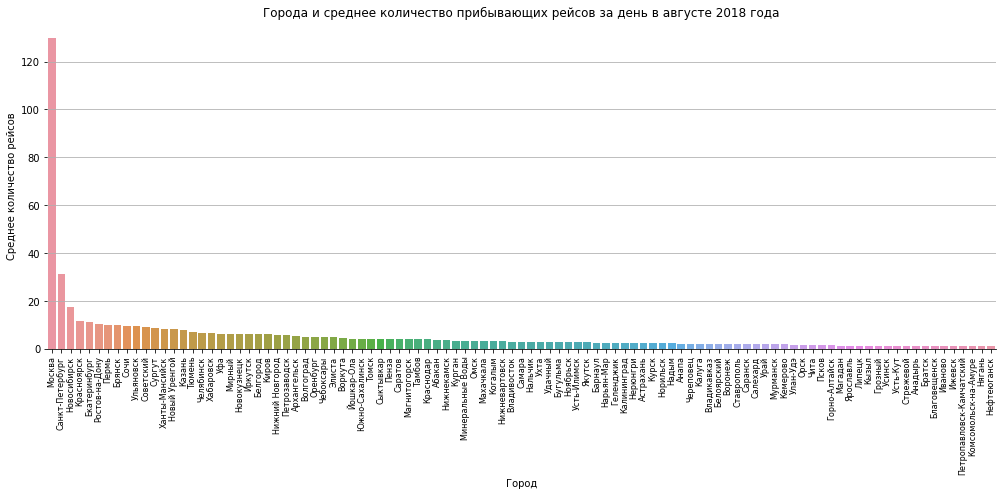

In [ ]:
f, ax = plt.subplots(figsize=(17, 6))
sns.barplot(data=city_flights.sort_values('average_flights',ascending = False), x='city', y='average_flights').set(title='Города и среднее количество прибывающих рейсов за день в августе 2018 года',
                                                                                                                   xlabel= 'Город',
                                                                                                                   ylabel='Среднее количество рейсов')
sns.despine(left=True, bottom=False)
ax.yaxis.grid(True)
plt.xticks(rotation=90, fontsize = 8)

Столица вырывается вперед - в августе 2018 в день в Москву прибывает наибольшее количество рейсов из всех городов России.<br>В топе по среднему количеству рейсов в день - крупнонаселенные города России, в хвосте - самые малонаселенные. В качестве примера, население Нефтеюганска на 1 января 2020 - 127 255 чел. Комсомольск-на Амуре - 244 768 чел, в топе - города-миллионники, например, Екатеринбург (1 493 749 чел.), в середине списка, например, Махачкала - 606 561	чел.

Выберем топ-10 городов с наибольшим средним количеством рейсов в день и построим график.

In [ ]:
city_flights.nlargest(10,'average_flights')

,city,average_flights
43,Москва,129.774194
70,Санкт-Петербург,31.161290
54,Новосибирск,17.322581
33,Красноярск,11.580645
20,Екатеринбург,11.322581
67,Ростов-на-Дону,10.193548
63,Пермь,10.129032
10,Брянск,10.000000
74,Сочи,9.612903
84,Ульяновск,9.580645


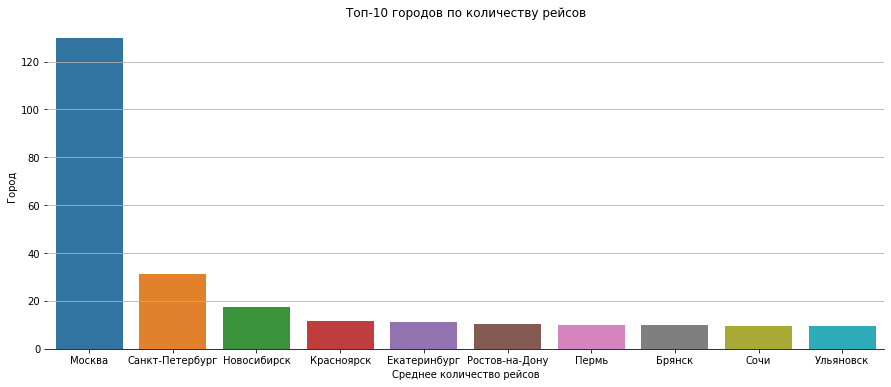

In [ ]:
f, ax = plt.subplots(figsize=(15, 6))

sns.barplot(data=city_flights.nlargest(10,'average_flights'), x='city', y='average_flights').set(title='Топ-10 городов по количеству рейсов',
                                                                                                                   xlabel= 'Среднее количество рейсов',
                                                                                                                   ylabel='Город')
ax.yaxis.grid(True)
sns.despine(left=True, bottom=False)


Самые популярные внутренние авианаправления - Москва и Санкт-Петербург, 2 столицы, у них показатель среднего количества прибывающих рейсов в день самый высокий - больше 20 рейсов в день. Следом за ними - Новосибирск, в среднем 17 рейсов в день.<br>
Во всех остальных городах среднее количество прибывающих рейсов в день примерно одинаковое - 9-11 рейсов в день: крупнейшие города России: Красноярск - 1 093 771 чел, Екатеринбург - 1 493 749 чел, Ростов-на-Дону - 1 137 904, Пермь - 1 055 397 чел, Брянск, Сочи и Ульяновск замыкают топ-10.<br>Выборка взята на период августа 2018, разгар курортного сезона, странно, что в Брянске и Ульяновске среднее количество прибывающих рейсов примерно такое же как в Сочи, одном из главных курортных городов России.

## Вывод

- Данные были получены и изучены, типы данных корректны, пропуски отсутствуют
- В ходе анализа были построены и изучены графики моделей самолетов и количества рейсов, городов и количество рейсов, топ-10 городов и количество рейсов и получены следующие выводы:
 - региональные самолеты с меньшей пассажировместимостью, предназначенные для полетов на небольшие расстояние, совершают большее количество рейсов, чем среднемагистральные лайнеры с большей пассажировместимостью
 - наибольшее количество рейсов в день совершается в самые крупнонаселенные города России, наименьшее - в самие малонаселенные
 - в топ-10 городов входят в основном города-миллионики, с самым большим населением, остальные города в топ-10 скорее всего меняются в зависимости от сезона и других факторов